In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_moons
warnings.filterwarnings(action='ignore')

플랫폼 별로 불러와서 합치기 플랫폼 칼러추가

In [4]:
df_game=pd.read_csv("../data/all_game.csv")
dic_genre={}
for idx,row in df_game.iterrows():
    nowg=row['genres']
    nowg=nowg.split('|')
    nowg.pop()
    for x in nowg:
        if(x in dic_genre):
            dic_genre[x]+=1
        else:
            dic_genre[x]=0
lgenres=list(dic_genre.keys())
jgenres = pd.DataFrame(np.zeros((len(df_game), len(lgenres))),columns=lgenres)
for i, genre in enumerate(df_game.genres):
    k=genre.split('|')
    k.pop()
    k=list(set(k))
    jgenres.loc[i, k] = 1
df_game = df_game.join(jgenres.add_prefix('genre_'))
df_game_d=df_game.drop(['genres','summary'],axis=1)
df_game_d=pd.get_dummies(df_game_d, columns = ['developer','platform','rating','release_date','publisher'])
print(df_game_d.shape)

(14355, 7134)


In [5]:
df_game_d

,title,metascore,userscore,genre_Simulation,genre_Virtual,genre_Career,genre_Action Adventure,genre_Sci-Fi,genre_General,genre_Arcade,...,publisher_souvenir circ.,publisher_stillalive studios,publisher_superflat games,publisher_team ok,publisher_teedoubleuGAMES,publisher_tiny Build GAMES,publisher_tinyBuild,publisher_tobyfox,publisher_ustwo,publisher_worm club
0,Surgeon Simulator: Experience Reality,43,4.40,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Transformers: Rise of the Dark Spark,43,4.20,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,NBA Live 14,43,2.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,WWE 2K20,43,1.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,VR Karts,42,5.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14350,Road 96,78,6.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14351,WRC 9 FIA World Rally Championship,78,6.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
14352,Shadow Warrior 3,78,6.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
14353,Blast Brigade vs. the Evil Legion of Dr. Cread,78,6.53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train, x_test, y_train, y_test = train_test_split(df_game_d.drop(['title','userscore'],axis=1), df_game_d['userscore'], random_state = 0)
pd.DataFrame(x_train)

,metascore,genre_Simulation,genre_Virtual,genre_Career,genre_Action Adventure,genre_Sci-Fi,genre_General,genre_Arcade,genre_Sports,genre_Traditional,...,publisher_souvenir circ.,publisher_stillalive studios,publisher_superflat games,publisher_team ok,publisher_teedoubleuGAMES,publisher_tiny Build GAMES,publisher_tinyBuild,publisher_tobyfox,publisher_ustwo,publisher_worm club
3839,73,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8455,73,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
11758,89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
8264,72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5923,58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,72,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3264,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9845,78,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
10799,82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
model = RandomForestRegressor(n_estimators=10)
model2=RandomForestRegressor(n_estimators=30)
model3=RandomForestRegressor(n_estimators=50)
model.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)
print(model.score(x_test,y_test))
print(model2.score(x_test,y_test))
print(model3.score(x_test,y_test))
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

0.3489460010657931
0.37857976095684975
0.3892947330133336
(10766, 7132) (10766,)
(3589, 7132) (3589,)


In [8]:
model4.fit(x_train,y_train)
print(model4.score(x_test,y_test))

0.39029889806290907


In [24]:
model5=RandomForestRegressor(n_estimators=65)
model5.fit(x_train,y_train)
print(model5.score(x_test,y_test))

0.3886895971064642
0.3827125061487566


60~65가 좋은 파라미터같음

In [29]:
importances=model4.feature_importances_
std=np.std([model4.feature_importances_  for tree in model4.estimators_],axis=0)
indices=np.argsort(importances)[::-1]
dic_importances={}
pred=model4.predict(x_test)
mse=np.square(np.subtract(y_test,pred)).mean()
print("MSE ERROR: ",mse) #10점만점
for f in range(x_train.shape[1]):
    dic_importances[x_train.columns[indices][f]]=importances[indices[f]]

MSE ERROR:  1.0306818710130912


dict

Randomforest모델의 장점 칼럼중요도를 알수있음

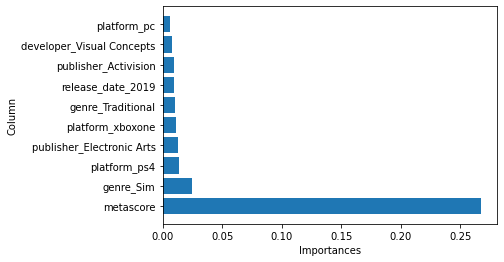

In [41]:
dic_importances= dict(sorted(dic_importances.items(), reverse=True,key=lambda x:x[1]))
k_importances=list(dic_importances.keys())[:10]
v_importances=list(dic_importances.values())[:10]
plt.xlabel("Importances")
plt.ylabel("Column")
plt.barh(k_importances,v_importances)
plt.savefig('graph.png',bbox_inches = 'tight')
plt.show()